In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the data
df = pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

We will now divide the dataset into two parts , one of the no of employees who left the organization and the other who were retained in the organization

In [4]:
left = df[df['left'] == 1]
left
left.shape

(3571, 10)

In [5]:
retained = df[df['left'] == 0]
retained
retained.shape

(11428, 10)

We will check the average of the columns by grouping the employees

In [6]:
df.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


Satisfaction_Level : From the above we can observe that the employees who left the organization had very less satisfaction level compared to the employees who were retained in the organization.

Average_Monthly_Hours : The average monthly hours are highest in the employees who are leaving the firm compared to the employees who were retained in the firm.

Promotion Last 5 years : The promotion is also the major factor as we can see that the employees who were less promoted tend to leave the company rather compared to the ones who had got promoted.

<AxesSubplot:xlabel='salary'>

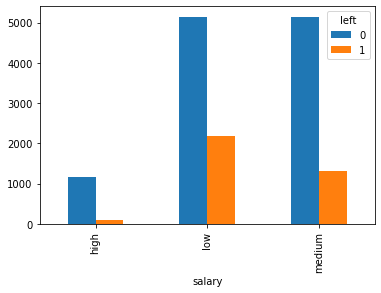

In [7]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

We can see that the people with usually high salary did not leave the organization often as the people with low salary.

<AxesSubplot:xlabel='Department'>

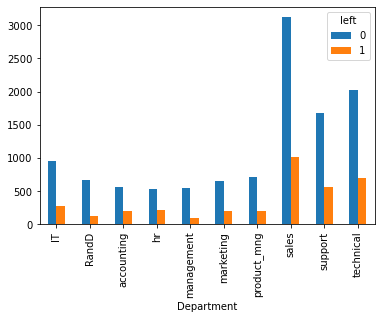

In [8]:
pd.crosstab(df['Department'], df['left']).plot(kind = 'bar')

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [9]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


We can see that salary column is categorical in nature , we will convert them into numerical variables using get_dummies function from pandas.

In [10]:
salary = pd.get_dummies(data['salary'], prefix='salary')
salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
new_df = pd.concat([data,salary],axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


Here we will remove the salary columns as it is already converted into categorical columns, we will also remove one of the converted columns from the data as two columns are enought to retrieve the information

In [12]:
new_df.drop(['salary','salary_high'], axis=1, inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


We will now convert the variables into dependent and independent variables 

In [13]:
X = new_df.copy()
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [14]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

We will now split the data into training and testing variables

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=99)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((10499, 5), (4500, 5), (10499,), (4500,))

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr  = LogisticRegression(solver='liblinear')

In [18]:
lr.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

In [19]:
y_pred = lr.predict(test_x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
lr.score(test_x,test_y)

0.7724444444444445

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [22]:
accuracy_score(test_y,y_pred)

0.7724444444444445

In [23]:
confusion_matrix(test_y,y_pred)

array([[3202,  229],
       [ 795,  274]])

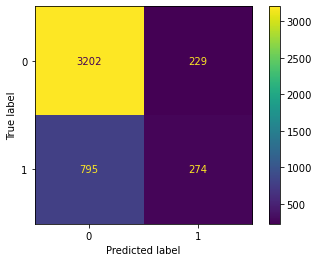

In [24]:
plot_confusion_matrix(lr, test_x, test_y)

We can see that here we are getting 77% of accuracy.